# **Processing Images 🚀**

In [ ]:
import numpy as np
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
import pickle
from matplotlib import pyplot as plt
from keras.preprocessing.image import array_to_img

import pandas as pd
import os

## **Load Dataset, Resize and Convert to Array 🖼️**

In [ ]:
def load_images():
    image_names = list()
    data_list = list()

    rootdir = '/Images'
    for filesss in os.walk(rootdir):
      files = filesss[2:][0]
    for file in files:
      filepath = rootdir +'/' + file
      if filepath.endswith(".jpg") or filepath.endswith(".jpeg") or filepath.endswith(".png"):
            print(file)
            pixels = load_img(filepath, target_size=(64, 64)) # resize all images to 64x64
            # convert to numpy array
            pixels = img_to_array(pixels)
            # store
            image_names.append(file)
            data_list.append(pixels)

    return image_names, np.asarray(data_list)

## **Saving preprocessed image to pickle 🗃️**

In [ ]:
def save_preprocessed_image_set(n_name='image_names.npy', a_name='image_arrays.npz'):
    image_names, image_array = load_images()

    np.save(n_name, image_names)

    print('Done saving images')

    np.savez_compressed(a_name, image_array)

    print("Done saving preprocessed data")

## **Normalize images to [-1,1] 🔢**

In [ ]:
def load_and_normalize_images(images='image_arrays.npz', image_names='image_names.npy', img_vectors='/Pickles/image_vectors'):
    imgs = np.load(images)['arr_0']
    img_names = np.load(image_names)

    image_name_image_vectors_dict = dict(zip(img_names, imgs))

    # Normalize image vectors from 0-255 to [-1, 1] and save results
    for k in image_name_image_vectors_dict:
        image_name_image_vectors_dict[k] = (image_name_image_vectors_dict[k].astype('float32') - 127.5) / 127.5

    pickle.dump(image_name_image_vectors_dict, open(img_vectors + ".p", "wb"))

    print("done")

In [ ]:
save_preprocessed_image_set()
load_and_normalize_images()

Streaming output truncated to the last 5000 lines.
3131160589_dc73c209b7.jpg
3147758035_e8a70818cb.jpg
314940358_ec1958dc1d.jpg
3126795109_73920ed5dc.jpg
3159995270_17334ccb5b.jpg
3134092148_151154139a.jpg
3154709407_9b0778cbeb.jpg
3161044966_27bf6f9dec.jpg
3126773489_7ae425af17.jpg
3155400369_69e3d6d70f.jpg
3134387321_3a253224c1.jpg
3157622277_9f59b4f62f.jpg
3146937399_8c046b7b1a.jpg
314904143_5a216a192b.jpg
3138504165_c7ae396294.jpg
3136404885_f4d8f1d15a.jpg
3163563871_cef3cf33ea.jpg
3151365121_e2a685a666.jpg
3139837262_fe5ee7ccd9.jpg
3138433655_ea1d59e5b7.jpg
3135504530_0f4130d8f8.jpg
3155451946_c0862c70cb.jpg
313051099_1bb87d6c56.jpg
3128514681_a51b415c31.jpg
3154693053_cfcd05c226.jpg
3122773470_b622205948.jpg
3127614086_9f1d3cf73d.jpg
314603661_51e05e0e24.jpg
3141293960_74459f0a24.jpg
3148647065_2d6cd88cf6.jpg
315436114_6d386b8c36.jpg
3132006797_04822b5866.jpg
3143155555_32b6d24f34.jpg
3157847991_463e006a28.jpg
3143159297_6f2f663ea6.jpg
3134586018_ae03ba20a0.jpg
3126981064_1e803c3

## **Display images 🖼️**

0 3561130207_d1ed166daa.jpg
a crowd of girls at a concert .
1 3018467501_a03d404413.jpg
a group of little girls jumping together in a backyard .
2 107582366_d86f2d3347.jpg
a group of eight people are gathered around a table at night .
3 3050114829_18bc5a6d7c.jpg
a lone surfer surfing a large collapsing wave in the ocean .
4 3359530430_249f51972c.jpg
a group of people watching a snowboarder perform a trick .
5 2736902411_a0010f89ae.jpg


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only


the girls are taking a picture of themselves .
6 507758961_e63ca126cc.jpg
a child in a white and orange outfit doing push ups .
7 3138399980_d6ab8b2272.jpg
a person in an orange shirt reaching up .
8 143684568_3c59299bae.jpg
a man standing on a cliff


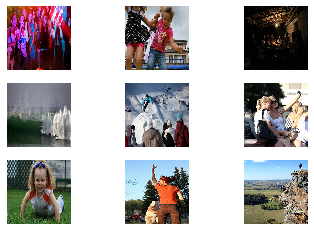

In [ ]:
def display_random_images():
    images = np.load('image_arrays.npz')['arr_0']
    image_names = np.load('image_names.npy')
    ix = np.random.randint(0, len(images), 50)
    images_t = images[ix]
    image_names = image_names[ix]
    n = 3
    for i in range(n * n):
        print(i, image_names[i])
        df = pd.read_csv('/CSVs/flickr8K_final.csv', ',', None)
        print(df.loc[df['Images_name'] == image_names[i], 'captions'].item())
        plt.subplot(n, n, 1 + i)
        plt.axis('off')
        plt.imshow(array_to_img(images_t[i]))
    plt.show()

display_random_images()